# Proyecto Data Science "Salarios de los cientificos de datos"

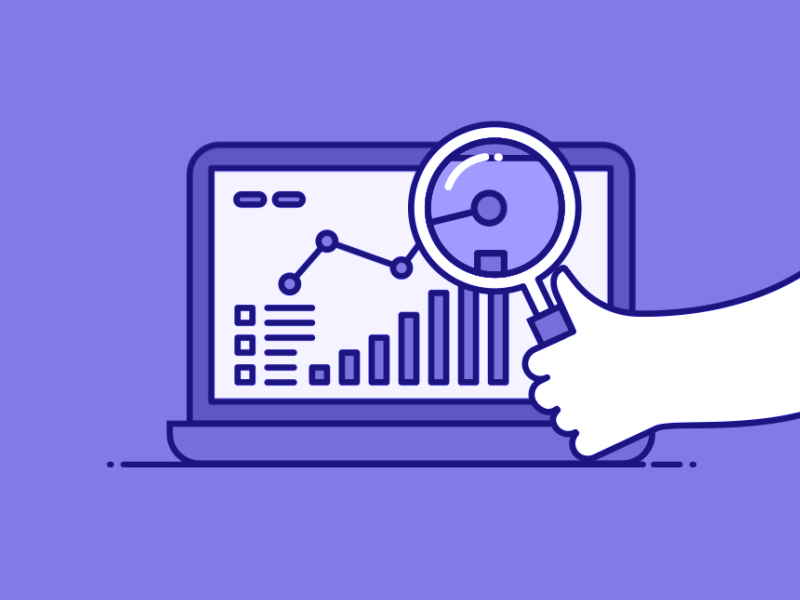

## Abstract

Desde que descubrí el mundo de la ciencia de datos, siempre he tenido una curiosidad insaciable por entender cómo las variables influyen en los resultados. En particular, me he preguntado: ¿Cuáles son las variables que más se correlacionan con el nivel de ingresos de un científico de datos? ¿El tamaño de la empresa tiene algo que ver con el nivel de ingresos?

Para responder a estas preguntas, decidí embarcarme en un proyecto de wrangling de datos. Comencé con un dataframe de salarios de científicos de datos, pero sabía que necesitaba más información para enriquecer mis datos. Así que decidí utilizar una API para obtener datos adicionales.

La API me proporcionó información valiosa sobre las empresas, como su tamaño y su ubicación. Con estos nuevos datos, pude enriquecer mi dataframe original y obtener una visión más completa del panorama.

Una vez que tuve todos los datos que necesitaba, comencé el proceso de wrangling. Limpié los datos, manejé los valores perdidos y outliers, y preparé los datos para el análisis.

Finalmente, llegó el momento de responder a mis hipótesis. Utilicé técnicas estadísticas para identificar las variables que más se correlacionaban con el nivel de ingresos. También analicé si el tamaño de la empresa tenía algún efecto en el nivel de ingresos.

Este proyecto fue un viaje increíblemente enriquecedor. No sólo me permitió responder a mis preguntas, sino que también me dio una visión más profunda del campo de la ciencia de datos. Me hizo darme cuenta de que quiero seguir creciendo y aprendiendo en este campo, y estoy emocionado por lo que vendrá a continuación.

***

Instalo el paquete python-dotenv en el entorno Python actual. Este paquete es útil para manejar archivos .env, que son una forma común y segura de almacenar configuraciones secretas o específicas del entorno (como claves API o contraseñas) para la aplicación.

In [2]:
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


Estoy utilizando este código para cargar dos claves API desde un archivo .env y almacenarlas en las variables api_key1 y api_key2. Esto es útil porque me permite mantener estas claves API fuera del código fuente, lo cual es una buena práctica para proteger información sensible. Ah si mismo el archivo en el que esta almacenadas las APIKEY esta incluido en un .gitignore.

In [3]:
from dotenv import load_dotenv
import os

load_dotenv()
api_key1 = os.getenv("API_KEY_DI")
api_key2 = os.getenv("API_KEY_BEN") #mi hijo colaborando con mi proyecto prestandome su APIkey :)

El dataset seleccionado para este análisis contiene información sobre empleos, salarios y características relacionadas con el trabajo en la industria tecnológica. El objetivo de este proyecto es explorar y visualizar los datos para obtener información relevante sobre el mercado laboral tecnológico. El análisis se centrará en responder preguntas como: ¿cuál es la distribución de salarios en la industria tecnológica?, ¿qué niveles de experiencia son más comunes?, ¿existe alguna relación entre el tamaño de la empresa y el salario?, entre otras.

Fuente y fecha: https://www.kaggle.com/code/ozgurbayram00/data-science-salaries-advanced-eda  
Jul 25, 2023 

Preguntas e hipótesis de interés:

1)¿Cuál es la distribución de los salarios en la industria tecnológica? Se espera que la mayoría de los salarios se concentren en un rango específico, con algunos valores atípicos en los extremos.

2)¿Existe alguna relación entre el nivel de experiencia y el salario? Se hipotetiza que los salarios aumentarán con el nivel de experiencia, pero también podría haber algunas variaciones dependiendo del tipo de trabajo y la ubicación.

3)¿Cómo se compara el tamaño de la empresa con los salarios? Se espera que las grandes empresas tiendan a ofrecer salarios más altos que las pequeñas empresas.

In [9]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests

# Carga del dataset
dataSet1 = '../data/jobs_data2.csv' #este fue agregado desde la API
dataSet2 = '../data/data.csv' #este fue obtenido desde keggle ya trabajado y limpio
df = pd.read_csv(dataSet1)
df1 = pd.read_csv(dataSet2)

# Resumen general del dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3755 non-null   int64  
 1   experience_level    3755 non-null   object 
 2   employment_type     3755 non-null   object 
 3   job_title           3755 non-null   object 
 4   salary              3755 non-null   float64
 5   salary_currency     3755 non-null   object 
 6   salary_in_usd       3755 non-null   int64  
 7   employee_residence  3755 non-null   object 
 8   remote_ratio        3755 non-null   int64  
 9   company_location    3755 non-null   object 
 10  company_size        3755 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 322.8+ KB
None


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         480 non-null    object 
 1   company_name  480 non-null    object 
 2   location      480 non-null    object 
 3   description   480 non-null    object 
 4   salaries      0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 18.9+ KB
None


En este proceso me fui encontrando una inconsistencias que debia solucionar, poseo un dataframe con datos limpios, sin nulos y con un aporte importante a nuestro tema de investigacion...
El caso era como podre aplicarle una buena limpieza para que posea datos relevantes de aporte para su posterior estudio.

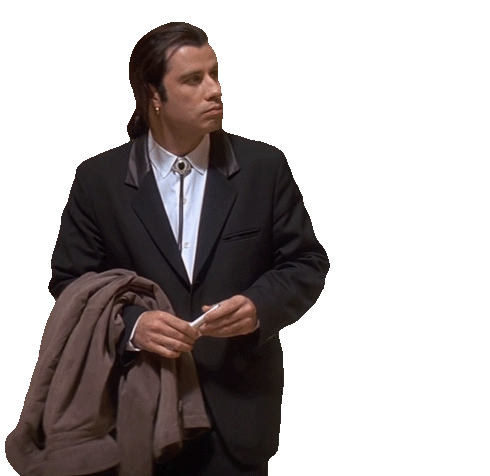

In [11]:
# Definimos las expresiones regulares para cada característica
regexes = {
    'work_year': r'\b(\d{4})\b',  # Asume que el año es un número de 4 dígitos
    'experience_level': r'\b(Junior|Intermedio|Senior|Ejecutivo)\b',
    'employment_type': r'\b(Tiempo completo|Tiempo parcial|Contrato|Freelance)\b',
    'job_title': r'\b(\w+)\b',  # Asume que el título del trabajo es una sola palabra
    'salary': r'\b(\d+)\b',  # Asume que el salario es un número
    'salary_currency': r'\b([A-Z]{3})\b',  # Asume que la moneda del salario es un código ISO 4217
    'salary_in_usd': r'\b(\d+)\b',  # Asume que el salario en USD es un número
    'employee_residence': r'\b([A-Z]{2})\b',  # Asume que la residencia del empleado es un código de país ISO 3166
    'remote_ratio': r'\b(\d+)\%\b',  # Asume que la proporción de trabajo remoto es un porcentaje
    'company_location': r'\b([A-Z]{2})\b',  # Asume que la ubicación de la empresa es un código de país ISO 3166
    'company_size': r'\b(\d+)\b'  # Asume que el tamaño de la empresa es un número
}

# Aplicamos las expresiones regulares a la columna 'description'
for feature, regex in regexes.items():
    df[feature] = df['description'].apply(lambda x: re.search(regex, x).group(1) if re.search(regex, x) else None)



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               480 non-null    object 
 1   company_name        480 non-null    object 
 2   location            480 non-null    object 
 3   description         480 non-null    object 
 4   salaries            0 non-null      float64
 5   work_year           188 non-null    object 
 6   experience_level    114 non-null    object 
 7   employment_type     0 non-null      object 
 8   job_title           480 non-null    object 
 9   salary              455 non-null    object 
 10  salary_currency     448 non-null    object 
 11  salary_in_usd       455 non-null    object 
 12  employee_residence  423 non-null    object 
 13  remote_ratio        3 non-null      object 
 14  company_location    423 non-null    object 
 15  company_size        455 non-null    object 
dtypes: float